# **Sentiment Analysis**

# Library

In [1]:
import numpy as np # Untuk Komputasi Numerik
import pandas as pd # Untuk Manipulasi Data
import matplotlib.pyplot as plt # Untuk Memvisualisasikan Data
import seaborn as sns # Untuk Memvisualisasikan Data
import warnings
warnings.filterwarnings("ignore") # Untuk Mengabaikan Warnings

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/TA NLP/googleplaystore_user_reviews.csv")
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
df.shape

(64295, 5)

Dari semua kolom yang ada, data yang diperlukan hanyalah kolom Translated_Review dan kolom Sentiment. Untuk itu kolom yang lain akan di drop atau dihilangkan. Bisa menggunakan **.drop** atau bisa menggunakan cara **.concat** kolom Translated_Review dan Kolom Sentiment.

In [5]:
df2 = df.drop(['App', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], axis=1)
df2.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive


In [6]:
df2.shape

(64295, 2)

Mengecek apabila ada sejumlah missing value dengan **.isnull()** atau bisa juga menggunakan **isna()**

In [7]:
df2.isnull().sum()

Translated_Review    26868
Sentiment            26863
dtype: int64

Drop kolom yang kosong dengan **.dropna()** dan cek jumlahnya kembali menggunakan **.shape**

In [8]:
df2.dropna(axis=0,inplace=True)

In [9]:
df2.shape

(37427, 2)

Karena Google Colab mempunyai limitasi, maka dari itu drop sejumlah baris untuk mempermudah tahapan processing dan modeling

In [10]:
df2.drop(df2.index[4000:28000], axis=0, inplace=True)
df2

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
...,...,...
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive


# Data Visualization

Adapun label dari kolom target sentiment dari data yang dimiliki adalah:
* Positive
* Neutral
* Negative

In [11]:
df2['Sentiment'].value_counts()

Positive    8674
Negative    2893
Neutral     1860
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiments Accumulations in each class')

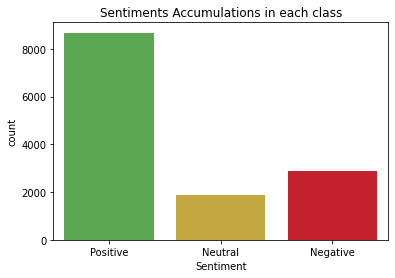

In [12]:
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df2.Sentiment, palette=['#4fb443',"#d9b42c", "#de061a"])
plt.title("Sentiments Accumulations in each class")

In [13]:
df2.Sentiment=[0 if i=="Positive" 
               else 1 
               if i== "Negative" 
               else 2 
               for i in df2.Sentiment]

Text(0.5, 1.0, 'Sentiments Accumulations in each class')

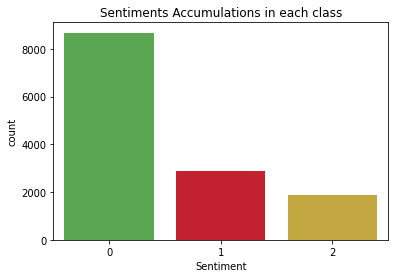

In [14]:
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df2.Sentiment, palette=['#4fb443', "#de061a", "#d9b42c"])
plt.title("Sentiments Accumulations in each class")

# Text Preprocessing

## Lowercase and Removing

In [15]:
df2.Translated_Review[0]

'I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'

In [16]:
import re
txt = df2.Translated_Review[0]
text=re.sub("[^a-zA-Z]"," ",txt) #mengganti setiap karakter selain huruf, dengan spasi
text=text.lower()

In [17]:
text

'i like eat delicious food  that s i m cooking food myself  case     best foods  helps lot  also  best before  shelf life  '

## Tokenizing & Stopwords

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
import nltk

from nltk.corpus import stopwords 
text=nltk.word_tokenize(text) # pisahkan kata dengan word_tokenize

In [23]:
len(text)

22

In [25]:
text

['i',
 'like',
 'eat',
 'delicious',
 'food',
 'that',
 's',
 'i',
 'm',
 'cooking',
 'food',
 'myself',
 'case',
 'best',
 'foods',
 'helps',
 'lot',
 'also',
 'best',
 'before',
 'shelf',
 'life']

In [26]:
text = [w for w in text if not w in stopwords.words('english')]

In [27]:
len(text)

15

## Lemmatization

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [29]:
import nltk as nlp
lemma=nlp.WordNetLemmatizer()
text=[lemma.lemmatize(i) for i in text]
text=" ".join(text)
text

'like eat delicious food cooking food case best food help lot also best shelf life'

In [30]:
text_list=[]
for i in df2.Translated_Review:
    text=re.sub("[^a-zA-Z]",
                " ",
                i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    text = [w for w in text if not w in stopwords.words('english')]
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [31]:
text_list

['like eat delicious food cooking food case best food help lot also best shelf life',
 'help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'helpful site help food get',
 'good',
 'useful information amount spelling error question validity information shared fixed star given',
 'thank great app add arthritis eye immunity kidney liver detox food please',
 'greatest ever completely awesome maintain health must ppl love',
 'good health good health first priority',
 'health important world either life think',
 'mr sunita bhati thankful developer make kind app really good healthy food body',
 'useful diabetes age need control sugar thanks',
 'one greatest apps',
 'good nice',
 'healthy really helped',
 'god health',
 'health always top priority mysg',
 'excellent useful',
 'found lot wealth form health',
 'found important',
 'healthy eating',
 'good simply good',
 'test',
 'good',
 'than

## Vectorize

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=20000  # a random value that we specify as the size of the bag of words
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray() # vectorization
all_words=cou_vec.get_feature_names() # bag of words
print(np.amax(sparce_matrix))

17


In [34]:
words = pd.DataFrame(sparce_matrix,columns=all_words)

## Wordcloud

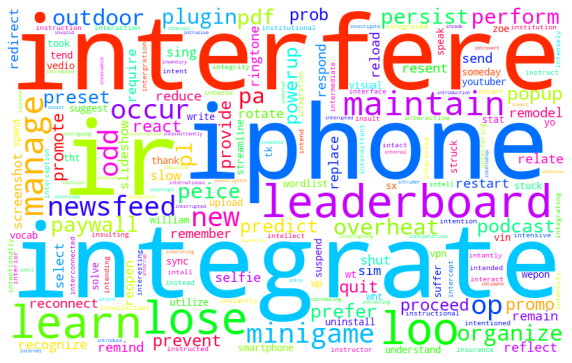

In [35]:
from wordcloud import WordCloud
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(width=800,
                     height=500,
                     background_color="white",
                     colormap="hsv",
                     random_state=42).generate(" ".join(all_words[4500:]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Define X & y

In [36]:
X=sparce_matrix
y=df2.iloc[:,1].values

## Split Train Data & Test Data

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Modeling

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
print("Akurasi Logistic Regression: ",lr.score(X_test,y_test))

Akurasi Logistic Regression:  0.8935219657483247


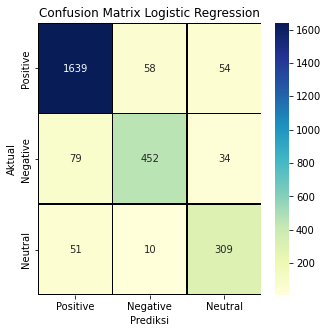

In [39]:
#confussion matrix
y_pred_lr=lr.predict(X_test)
y_true=y_test
from sklearn.metrics import confusion_matrix
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred_lr)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,
            linewidth=.5,
            cmap="YlGnBu",linecolor="black",
            fmt=".0f",ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Logistic Regression")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=150)
dt.fit(X_train, y_train)
print("Akurasi Decision Tree: ",dt.score(X_test,y_test))

Akurasi Decision Tree:  0.8763961280714817


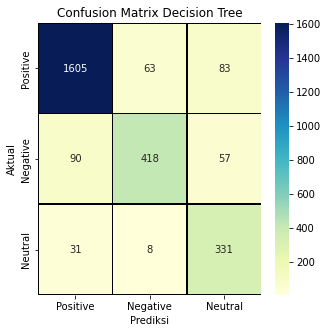

In [41]:
#confussion matrix
y_pred_dt=dt.predict(X_test)
y_true=y_test
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred_dt)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,
            linewidth=.5,
            cmap="YlGnBu",linecolor="black",
            fmt=".0f",ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Decision Tree")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,
                            max_depth=200)
rf.fit(X_train, y_train)
print("Akurasi Random Forest: ",rf.score(X_test,y_test))

Akurasi Random Forest:  0.8808637379002234


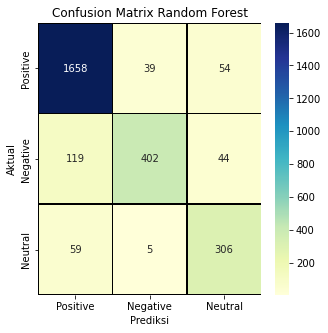

In [43]:
#confussion matrix
y_pred_rf=rf.predict(X_test)
y_true=y_test
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred_rf)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,
            linewidth=.5,
            cmap="YlGnBu",linecolor="black",
            fmt=".0f",ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Random Forest")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Neural Network

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [45]:
model = Sequential([
    Dense(3, activation='relu',input_shape=(X_train[1].shape)),    # input_shape should be given only 1d
    Dense(3, activation='softmax')
])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 30123     
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 30,135
Trainable params: 30,135
Non-trainable params: 0
_________________________________________________________________


In [47]:
adam = tf.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer = adam,
              metrics = ['accuracy']
             )

In [48]:
history = model.fit(X_train,y_train,epochs = 5, verbose = 1)

Epoch 1/5
336/336 [==============================] - 3s 6ms/step - loss: 0.9848 - accuracy: 0.6348
Epoch 2/5
336/336 [==============================] - 2s 6ms/step - loss: 0.6858 - accuracy: 0.6657
Epoch 3/5
336/336 [==============================] - 2s 6ms/step - loss: 0.4937 - accuracy: 0.7879
Epoch 4/5
336/336 [==============================] - 2s 6ms/step - loss: 0.3783 - accuracy: 0.9029
Epoch 5/5
336/336 [==============================] - 2s 5ms/step - loss: 0.3009 - accuracy: 0.9371


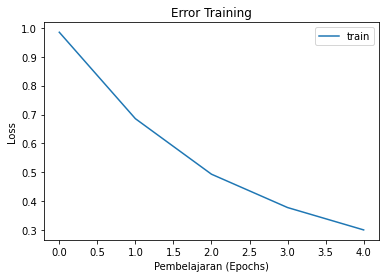

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.title('Error Training')
plt.ylabel('Loss')
plt.xlabel('Pembelajaran (Epochs)')
plt.legend()
plt.show()

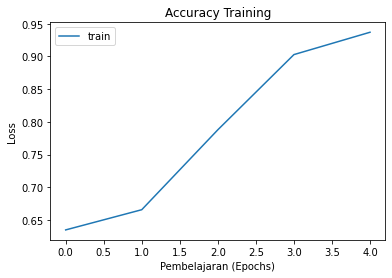

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.title('Accuracy Training')
plt.ylabel('Loss')
plt.xlabel('Pembelajaran (Epochs)')
plt.legend()
plt.show()

In [51]:
y_nn = model.predict(X_test)
y_nn[:5]

array([[2.9610711e-01, 5.8914983e-01, 1.1474306e-01],
       [9.9993408e-01, 3.9662373e-06, 6.1927705e-05],
       [9.0858340e-01, 5.6429323e-02, 3.4987245e-02],
       [9.9989116e-01, 8.2258011e-06, 1.0066124e-04],
       [6.3917226e-01, 2.7212551e-01, 8.8702217e-02]], dtype=float32)

In [52]:
testing = model.evaluate(X_test,y_test,verbose=1)

84/84 [==============================] - 0s 4ms/step - loss: 0.3928 - accuracy: 0.8742


In [53]:
testing

[0.39283034205436707, 0.8741623163223267]

In [54]:
akurasi_nn = testing[1:2]

In [55]:
print("Akurasi Neural Network: ",akurasi_nn)

Akurasi Neural Network:  [0.8741623163223267]


# Consclusion

Model | Akurasi Model
--|--
Logistic Regression | 89.35%
Decision Tree | 87.63%
Random Forest | 88.08%
Neural Network | 87.41%

1. Sekalipun ada pengurangan sejumlah data dengan drop baris index, namun akurasi model tampak signifikan dan konstan tidak berubah banyak terhadap eksperimen sebelumnya

2. Dari modeling di atas, akurasi dari Logistic Regression diketahui yang tertinggi diantara algoritma yang lain.